### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn import preprocessing
from pylab import *
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food fit'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged.csv'))

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # only 3 numbers for decimal

In [6]:
# matplotlib.rcParams['axes.formatter.useoffset'] = False

In [7]:
df.shape

(6213092, 11)

In [8]:
df.head()

,Unnamed: 0,Area,Element_x,Year,Unit_x,Value_x,Element_y,Months,Unit_y,Value_y,_merge
0,0,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Temperature change,January,?C,1.596,both
1,1,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Standard Deviation,January,?C,1.947,both
2,2,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Temperature change,February,?C,-0.881,both
3,3,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Standard Deviation,February,?C,2.590,both
4,4,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Temperature change,March,?C,-0.237,both


In [9]:
df.columns

Index(['Unnamed: 0', 'Area', 'Element_x', 'Year', 'Unit_x', 'Value_x',
       'Element_y', 'Months', 'Unit_y', 'Value_y', '_merge'],
      dtype='object')

In [10]:
df['Element_x'].value_counts()

Emissions (CO2eq) (AR5)             904264
Emissions (N2O)                     896784
Emissions (CO2eq) from N2O (AR5)    896784
Emissions (CH4)                     754222
Emissions (CO2eq) from CH4 (AR5)    754222
Direct emissions (N2O)              693940
Indirect emissions (N2O)            693940
Emissions (CO2)                     618936
Name: Element_x, dtype: int64

In [11]:
df.isnull().sum()

Unnamed: 0    0
Area          0
Element_x     0
Year          0
Unit_x        0
Value_x       0
Element_y     0
Months        0
Unit_y        0
Value_y       0
_merge        0
dtype: int64

In [12]:
df3 = df[df['Element_x'].isin(['Emissions (CO2eq) from N2O (AR5)', 'Emissions (CO2eq) from CH4 (AR5)','Emissions (CO2)']) ]

In [13]:
df2 = df3[['Element_x','Year','Value_x','Value_y']]

In [14]:
df3['Element_x'].value_counts()

Emissions (CO2eq) from N2O (AR5)    896784
Emissions (CO2eq) from CH4 (AR5)    754222
Emissions (CO2)                     618936
Name: Element_x, dtype: int64

In [15]:
df2[df2['Element_x']=='Emissions (CO2)']

,Element_x,Year,Value_x,Value_y
476,Emissions (CO2),2000,-2388.803,1.596
477,Emissions (CO2),2000,-2388.803,1.947
478,Emissions (CO2),2000,-2388.803,-0.881
479,Emissions (CO2),2000,-2388.803,2.590
480,Emissions (CO2),2000,-2388.803,-0.237
...,...,...,...,...
6212985,Emissions (CO2),2019,399.054,0.519
6212986,Emissions (CO2),2019,399.054,1.675
6212987,Emissions (CO2),2019,399.054,0.501
6212988,Emissions (CO2),2019,399.054,1.359


In [16]:
df2[df2['Element_x']=='Emissions (CO2eq) from CH4 (AR5)']

,Element_x,Year,Value_x,Value_y
136,Emissions (CO2eq) from CH4 (AR5),2000,8637.597,1.596
137,Emissions (CO2eq) from CH4 (AR5),2000,8637.597,1.947
138,Emissions (CO2eq) from CH4 (AR5),2000,8637.597,-0.881
139,Emissions (CO2eq) from CH4 (AR5),2000,8637.597,2.590
140,Emissions (CO2eq) from CH4 (AR5),2000,8637.597,-0.237
...,...,...,...,...
6213019,Emissions (CO2eq) from CH4 (AR5),2019,7321.668,0.519
6213020,Emissions (CO2eq) from CH4 (AR5),2019,7321.668,1.675
6213021,Emissions (CO2eq) from CH4 (AR5),2019,7321.668,0.501
6213022,Emissions (CO2eq) from CH4 (AR5),2019,7321.668,1.359


In [17]:
df2[df2['Element_x']=='Emissions (CO2eq) from N2O (AR5)']

,Element_x,Year,Value_x,Value_y
170,Emissions (CO2eq) from N2O (AR5),2000,2911.322,1.596
171,Emissions (CO2eq) from N2O (AR5),2000,2911.322,1.947
172,Emissions (CO2eq) from N2O (AR5),2000,2911.322,-0.881
173,Emissions (CO2eq) from N2O (AR5),2000,2911.322,2.590
174,Emissions (CO2eq) from N2O (AR5),2000,2911.322,-0.237
...,...,...,...,...
6213053,Emissions (CO2eq) from N2O (AR5),2019,4216.897,0.519
6213054,Emissions (CO2eq) from N2O (AR5),2019,4216.897,1.675
6213055,Emissions (CO2eq) from N2O (AR5),2019,4216.897,0.501
6213056,Emissions (CO2eq) from N2O (AR5),2019,4216.897,1.359


In [18]:
df2.drop(columns=['Element_x'],inplace=True)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df2['Year'] = df2['Year'].astype(str)

C:\Users\Marce\AppData\Local\Temp/ipykernel_11980/4252993604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Year'].astype(str)


In [20]:
df2['Value_x'] = df2['Value_x'].astype(np.int64)

C:\Users\Marce\AppData\Local\Temp/ipykernel_11980/3099714571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Value_x'] = df2['Value_x'].astype(np.int64)


In [21]:
df2.dtypes

Year        object
Value_x      int64
Value_y    float64
dtype: object

In [22]:
df2.shape

(2269942, 3)

### 2. The elbow technique

In [23]:
# define range of potential clusters
num_cl = range(1, 5)

# define k-means clusters in the range from above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [24]:
# create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # defines k-means clusters for range set above

score

[-8917355864199943.0,
 -3950799054173122.0,
 -2658820608296224.0,
 -1617476250093557.2]

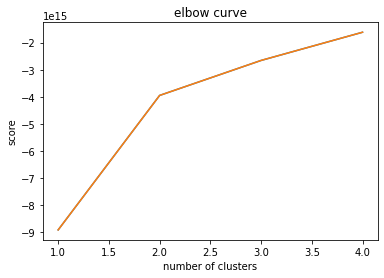

In [25]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('elbow curve')
pl.plot(num_cl,score)
pl.show()

# breakpoint is 3

### 3. k-means clustering

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) # n_jobs -> use all processor cores/split the task

In [27]:
kmeans.fit(df2)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [28]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Marce\AppData\Local\Temp/ipykernel_11980/3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [29]:
df2.head(5)

,Year,Value_x,Value_y,clusters
136,2000,8637,1.596,0
137,2000,8637,1.947,0
138,2000,8637,-0.881,0
139,2000,8637,2.590,0
140,2000,8637,-0.237,0


In [30]:
df2["clusters"].value_counts()

0    2233868
1      30634
2       5440
Name: clusters, dtype: int64

In [31]:
df2.describe()

,Value_x,Value_y,clusters
count,2269942.000,2269942.000,2269942.000
mean,11632.451,0.834,0.018
std,62677.370,0.784,0.151
min,-730942.000,-9.303,0.000
25%,5.000,0.414,0.000
50%,718.000,0.687,0.000
75%,6126.000,1.110,0.000
max,1627228.000,11.759,2.000


In [32]:
df2.median()

Year       2010.000
Value_x     718.000
Value_y       0.687
clusters      0.000
dtype: float64

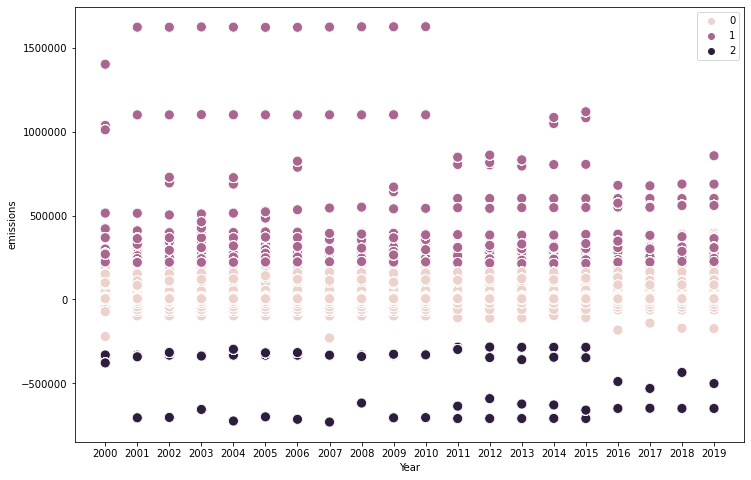

In [33]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Year'], y=df2['Value_x'],hue=kmeans.labels_,s=100)

# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.ticklabel_format(axis="y", style='plain') # plz no scientific notation
plt.xlabel('Year') # Label x-axis.
plt.ylabel('emissions') # Label y-axis.
plt.savefig('cluster emissionyear.png') # save as png
plt.show()

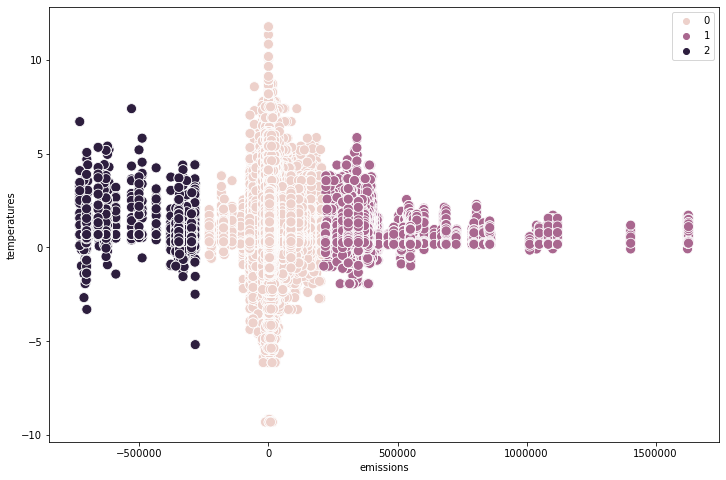

In [34]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Value_x'], y=df2['Value_y'],hue=kmeans.labels_, s=100)

# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.ticklabel_format(axis="x", style='plain') # plz no scientific notation
plt.xlabel('emissions') # Label x-axis.
plt.ylabel('temperatures') # Label y-axis.
plt.savefig('cluster emissiontemp.png') # save as png
plt.show()

In [35]:
df2.loc[df2['clusters'] == 0, 'clusters'] = 'red'
df2.loc[df2['clusters'] == 1, 'clusters'] = 'blue'
df2.loc[df2['clusters'] == 2, 'clusters'] = 'green'

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [36]:
df2.head(5)

,Year,Value_x,Value_y,clusters
136,2000,8637,1.596,red
137,2000,8637,1.947,red
138,2000,8637,-0.881,red
139,2000,8637,2.590,red
140,2000,8637,-0.237,red


In [37]:
df2.groupby('clusters').agg({'Value_x':['mean', 'median'],
                         'Value_y':['mean', 'median']})

Value_x             Value_y       
                mean      median    mean median
clusters                                       
blue      411554.534  363254.000   0.763  0.611
green    -480581.875 -349108.000   0.978  0.746
red         7346.805     676.000   0.835  0.687